In [67]:
import argparse

import torch
import uuid

import numpy as np

from torch_geometric.nn import Node2Vec
from torch_geometric.utils import erdos_renyi_graph

import os
import csv

import gph
import gtda
from gtda import diagrams
from gtda import homology

import matplotlib.pyplot as plt

In [68]:
## import files
d = 5
n = 10
l = 10 
c = 5

filename = 'er'
filename += '-c'+str(c)
filename += '-d'+ str(d)
filename += '-l'+str(l)
filename += '-n'+ str(n)

## get filenames according to filter
path = '../rawos'
files = []
for i in os.listdir(path):
    if os.path.isfile(os.path.join(path,i)) and filename in i:
        files.append(i)
        
print(files)

['er-c5-d5-l10-n10-3ab3b40f452544febe3662e98bc3cdfe.tsv', 'er-c5-d5-l10-n10-3eb59b182eb3460081807487e0a76f35.tsv']


In [73]:
## load embeddings

Emb_list= []
dim = 0
for i,file in zip(range(len(files)),files): 
    emb = np.loadtxt(path+'/'+file, delimiter="\t")
    Emb_list.append(emb)
    if emb.shape[0] > dim:
        dim = emb.shape[0]

Embs = np.zeros((len(Emb_list),dim,5)) 
for i in range(len(Emb_list)):
    Embs[i,:,:] = Emb_list[i] 
##compute PH
ph = gtda.homology.VietorisRipsPersistence(metric='euclidean', max_edge_length=np.inf, homology_dimensions=(0, 1), coeff=2, infinity_values=None, n_jobs=None).fit_transform(Embs)
print(ph.shape)

## compute pairwise distances
Dist  =gtda.diagrams.PairwiseDistance(metric='wasserstein', metric_params=None, order=2.0, n_jobs=None).fit_transform(ph, None)
print(Dist)



(2, 312, 3)
[[0.         1.33051071]
 [1.33072866 0.        ]]


In [74]:
emb.shape[0]

200

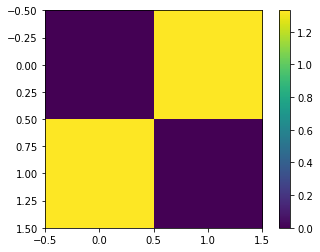

In [75]:
plt.imshow(Dist)
plt.colorbar()
plt.show()